# MLP for the two circles problem

In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization


# Generate 2d dataset

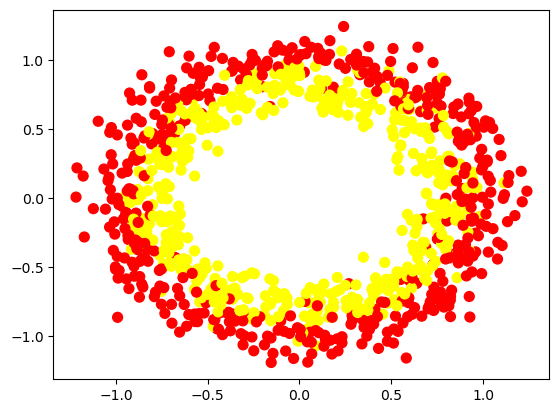

In [2]:
x,y=make_circles(n_samples=1000,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

# Split the data for train & test

In [3]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]


# Define the Model

In [4]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

#optimizer
optm=SGD(learning_rate=0.01,momentum=0.9)

#compiler
model.compile(loss='binary_crossentropy',optimizer=optm,metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [6]:
#Run the NN
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=2)


Epoch 1/100
16/16 - 3s - loss: 0.7555 - accuracy: 0.4880 - val_loss: 0.7145 - val_accuracy: 0.4860 - 3s/epoch - 174ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6472 - accuracy: 0.6460 - val_loss: 0.7239 - val_accuracy: 0.4960 - 154ms/epoch - 10ms/step
Epoch 3/100
16/16 - 0s - loss: 0.5607 - accuracy: 0.7900 - val_loss: 0.8021 - val_accuracy: 0.4960 - 156ms/epoch - 10ms/step
Epoch 4/100
16/16 - 0s - loss: 0.5219 - accuracy: 0.7600 - val_loss: 0.8216 - val_accuracy: 0.4980 - 126ms/epoch - 8ms/step
Epoch 5/100
16/16 - 0s - loss: 0.5076 - accuracy: 0.7700 - val_loss: 0.7897 - val_accuracy: 0.5060 - 124ms/epoch - 8ms/step
Epoch 6/100
16/16 - 0s - loss: 0.4905 - accuracy: 0.7640 - val_loss: 0.7699 - val_accuracy: 0.5160 - 133ms/epoch - 8ms/step
Epoch 7/100
16/16 - 0s - loss: 0.4915 - accuracy: 0.7640 - val_loss: 0.7243 - val_accuracy: 0.5360 - 136ms/epoch - 9ms/step
Epoch 8/100
16/16 - 0s - loss: 0.4889 - accuracy: 0.7620 - val_loss: 0.6721 - val_accuracy: 0.5680 - 126ms/epoch - 8ms/step
Epoch 9

Epoch 67/100
16/16 - 0s - loss: 0.4529 - accuracy: 0.7960 - val_loss: 0.3665 - val_accuracy: 0.8420 - 119ms/epoch - 7ms/step
Epoch 68/100
16/16 - 0s - loss: 0.4344 - accuracy: 0.7900 - val_loss: 0.3664 - val_accuracy: 0.8360 - 149ms/epoch - 9ms/step
Epoch 69/100
16/16 - 0s - loss: 0.4402 - accuracy: 0.7920 - val_loss: 0.3629 - val_accuracy: 0.8520 - 175ms/epoch - 11ms/step
Epoch 70/100
16/16 - 0s - loss: 0.4226 - accuracy: 0.7960 - val_loss: 0.3593 - val_accuracy: 0.8500 - 134ms/epoch - 8ms/step
Epoch 71/100
16/16 - 0s - loss: 0.4432 - accuracy: 0.8060 - val_loss: 0.3615 - val_accuracy: 0.8520 - 162ms/epoch - 10ms/step
Epoch 72/100
16/16 - 0s - loss: 0.4262 - accuracy: 0.8020 - val_loss: 0.3607 - val_accuracy: 0.8460 - 153ms/epoch - 10ms/step
Epoch 73/100
16/16 - 0s - loss: 0.4342 - accuracy: 0.8020 - val_loss: 0.3618 - val_accuracy: 0.8480 - 174ms/epoch - 11ms/step
Epoch 74/100
16/16 - 0s - loss: 0.4344 - accuracy: 0.7900 - val_loss: 0.3696 - val_accuracy: 0.8440 - 136ms/epoch - 9ms/s

# Evaluate the model

In [7]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

16/16 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8540
Train Accuracy:	 0.8379999995231628

Test Accuracy:	 0.8539999723434448


# Plot the results

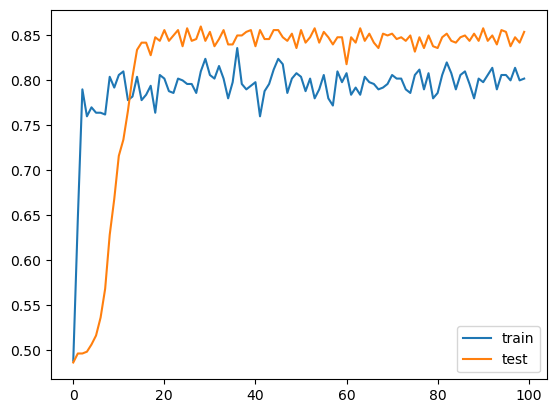

In [8]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

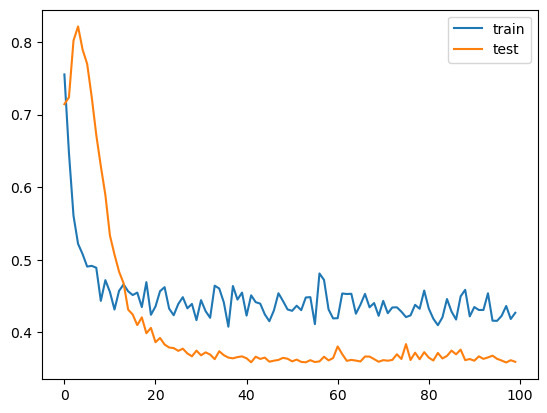

In [9]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()
